# 你好!

Welcome to "Machine Learning" Chinese!

## What is this about?

Not surprisingly, this tutorial is about Python, Machine Learning and Chinese. We are going to explore ways to understand and improve language learning with Python.

The tutorial is split into three sections:

* Learning Chinese vocabulary: Here we will explore text data from the web and will try to get an understanding of which words we will have to learn in order to understand everyday Chinese.
* Learning Chinese characters: Here we will look at Chinese characters and use machine learning to make learning them easier for us
* Learning Chinese pronounication: Here we will use machine learning to help us pronounce Chinese syllables better

Let's get started!

## Words, words, words

The first thing you need to do when learning a new language is to get an idea of the vocabulary

In [78]:
%matplotlib inline
from matplotlib import rc
rc('font', size=20)

First, we need to get some data that we can work with. We are going to scrape it off the web using a Python library / tool called **Scrapy**.

Scrapy makes it easy to build and run crawlers and provides much of the functionality that makes scraping easy, like following links and parsing documents.

You can read more about Scrapy on the project's website:

http://scrapy.org/

Scrapy is designed to work as a command-line-tool, hence we will not do this part of the tutorial in the IPython notebook but rather on the command line.

We are going to use Scrapy to build crawlers for various Chinese websites.

**Let's have a look at the code of our scrapers!**

(open the **scraper** subdirectory with your favorite editor)

## Running the crawlers

Now that we understand our crawlers, we can run them using the following command:

    #run the crawler and store the result as JSON (one JSON document per line, for easy parsing)
    
    scrapy crawl wikipedia -o wikipedia.json -t jsonlines
    
This runs the Wikipedia crawlers and stores the results as JSON documents, where each result will be written as a one-line JSON document. This is useful because it makes loading the data much easier.

In [79]:
#first, let's import json and nltk libraries, which we're gonna need in a second
import json #from the Python standard library

def load_scraped_data(filename):
    items = []
    with open(filename,'r') as input_file:
        for i,line in enumerate(input_file):
            try:
                items.append(json.loads(line))
            except:
                print("Cannot parse JSON at line {}".format(i+1,))
                pass
    return items

sites = ['wikipedia','china_daily']
        
filename = 'scraper/wikipedia.json'

items = load_scraped_data(filename)

Cannot parse JSON at line 24741


In [80]:
#Let's have a look at the items...
print items[0]['text'][:200],'...'

# 维基百科

海納百川，有容乃大  
人人可編輯的自由百科全書

已有889,828篇條目

分类 | 主题 | 求助  
---|---|---  
入门 | 沙盒 | 捐款  
  
## 特色列表

**2002年亞洲運動會獎牌榜**：2002年亞洲運動會（官方名稱為第十四屆亞洲運動會）是2002年9月29日至10月14日於韓國釜山舉行的綜合運動會。釜山是繼1986年首爾之後，第二個主辦亞 ...


## Cleaning the data

As you can see, there are various non-chinese characters in the text. For now, we will just leave them there, as we do not want to change the ordering of characters (i.e. if we had "媒：习" and we'd remove the "：", the two characters would appear in a sequence, which will distort our later analyses).

In [81]:
from collections import defaultdict
import numpy as np

def get_ngram_distribution(text,n=2):
    distribution=defaultdict(lambda: 0)
    for i in range(len(text)-n+1):
        #we are only interested in non-ascii characters here...
        t=text[i:i+n]
        if all([ord(c) > 255 for c in t]):
            distribution[t]+=1
    return distribution

def remove_ngrams(text,ngrams):
    for ngram in ngrams:
        while text.find(ngram) != -1:
            i=text.find(ngram)
            substr = text[i:i+len(ngram)]
            j=i
            while j > 0 and text[j:j+len(ngram)] in ngrams:
                j-=1
            k=i
            while k < len(text)-len(ngram) and text[k:k+len(ngram)] in ngrams:
                k+=1
            text = text[:j]+text[k+len(ngram):]
    return text
            
def remove_common_ngrams(items,threshold=0.5,n=3):
    full_text = ' '.join([item['text'] for item in items])
    ngram_distribution = get_ngram_distribution(full_text,n=n)
    common_ngrams = {''.join(v[0]) for v in sorted(ngram_distribution.items(),key=lambda x:-x[1]) if v[1] > threshold*len(items)}
    for item in items:
        item['text']=remove_ngrams(item['text'],common_ngrams)
    return common_ngrams

removed_ngrams=remove_common_ngrams(items,n=6,threshold=0.05)

In [50]:
from collections import defaultdict

def get_character_distribution(text):
    distribution = defaultdict(lambda: 0)
    for character in text:
        #we are only interested in non-ascii characters here...
        if ord(character) > 255:
            distribution[character]+=1
    return distribution

full_text = ' '.join([item['text'] for item in items])
character_distribution = get_character_distribution(full_text)

In [51]:
sorted_character_distribution = sorted(character_distribution.items(), key=lambda x: -x[1])
print '\n'.join([u'{}: {}'.format(c[0],c[1]) for c in sorted_character_distribution[:100]])

一: 166749
，: 155920
页: 132207
的: 109571
上: 82732
下: 73891
。: 70063
国: 64874
、: 49301
中: 47796
在: 31192
”: 30032
“: 29975
是: 29075
人: 28764
和: 28045
大: 24830
发: 24714
不: 22355
会: 22243
了: 21741
有: 21704
新: 21636
年: 21321
要: 20694
为: 19662
民: 18746
作: 18224
党: 16953
展: 16717
全: 16334
网: 16220
经: 15409
出: 15256
主: 15022
业: 14975
家: 14922
成: 14616
实: 14286
日: 14198
对: 14154
行: 14104
政: 13952
来: 13629
：: 13485
理: 13144
个: 13072
进: 13060
力: 12943
法: 12853
时: 12636
这: 12296
我: 12292
方: 12287
动: 12027
平: 12024
地: 12000
重: 11775
生: 11659
学: 11499
强: 11429
工: 11386
关: 11381
以: 11186
多: 10703
合: 10701
化: 10602
体: 10530
能: 10277
到: 10253
建: 10217
们: 10143
同: 10085
部: 10060
开: 9932
分: 9930
海: 9804
现: 9730
自: 9430
月: 9387
于: 9234
产: 9177
与: 9142
就: 9092
制: 9014
事: 8947
长: 8863
面: 8854
定: 8761
共: 8697
过: 8655
信: 8625
济: 8606
高: 8603
习: 8590
推: 8455
创: 8440
治: 8398
问: 8250
领: 8164


* 中 (zhong1): middle (e.g. 中国 (zhong1 guo2): China [middle country])
* 国 (guo2): country
* 上 (shang4): above

[]

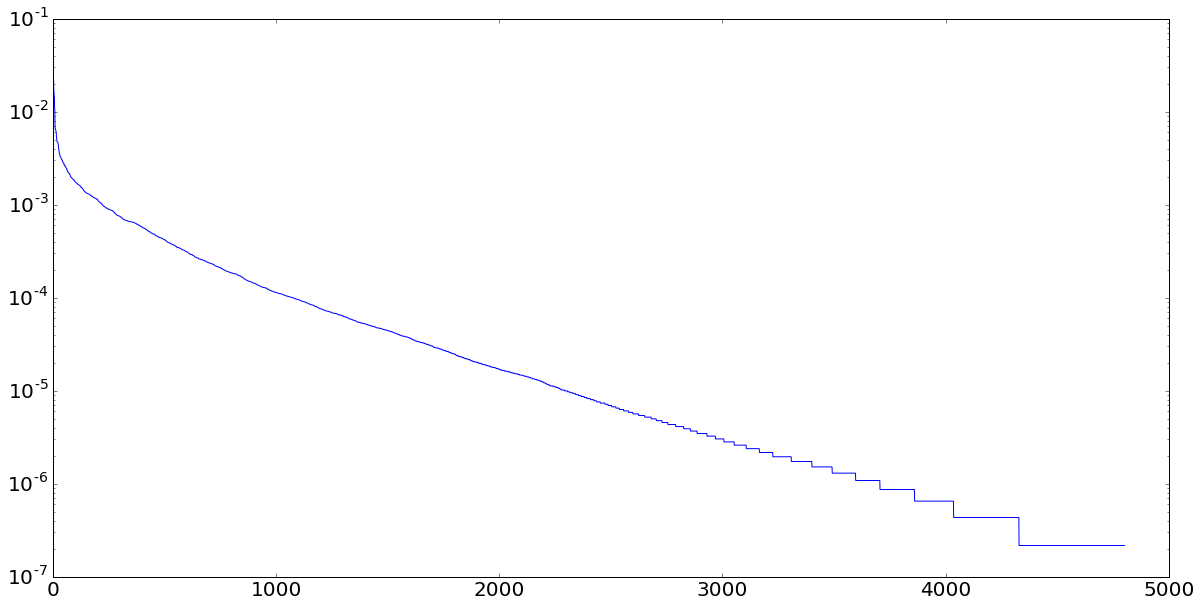

In [52]:
from matplotlib import pylab 
import numpy as np
total_words = float(sum([c[1] for c in sorted_character_distribution]))
X = np.arange(len(sorted_character_distribution))
frequencies = np.array([float(c[1])/total_words for c in sorted_character_distribution])
pylab.figure(figsize=(20,10))
pylab.plot(X,frequencies)
pylab.semilogy()

In [53]:
import scipy.optimize
import numpy as np

def model(x,a,b,c):
    return -x**b*c+a

popt_p, pcov_p = scipy.optimize.curve_fit(model, X, np.log(frequencies),[0.03,0.5,0.1])

print popt_p

[-5.62694326  0.69092786  0.02830824]


[]

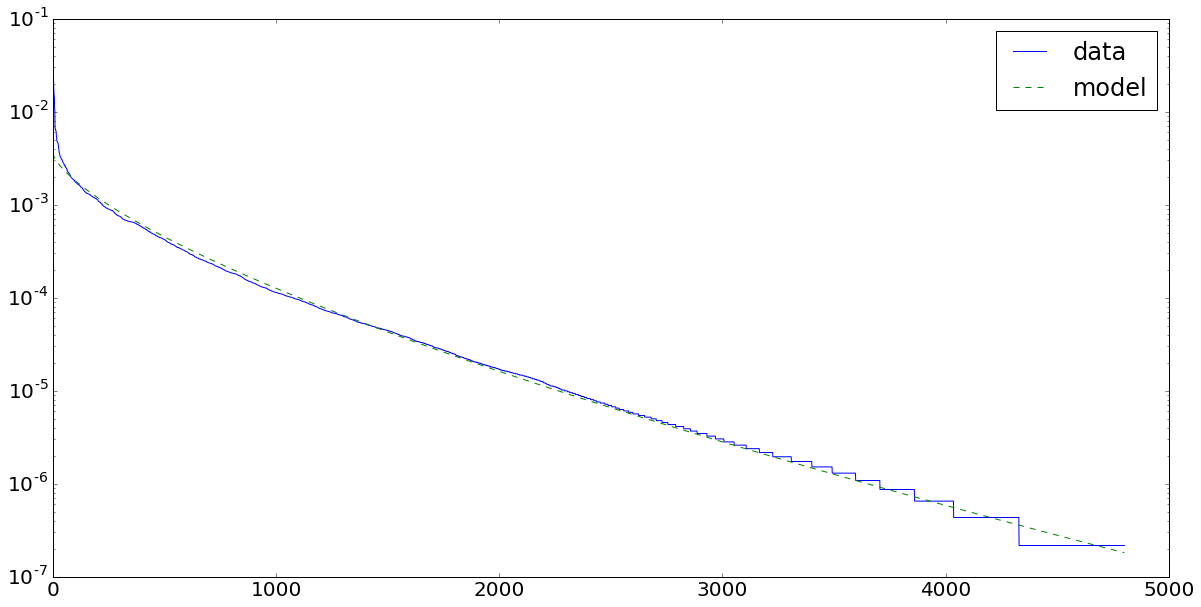

In [54]:
pylab.figure(figsize=(20,10))
pylab.plot(X,frequencies)
pylab.plot(X,np.exp(model(X,*popt_p)),ls='--')
pylab.legend(['data','model'])
pylab.semilogy()

(0, 1)

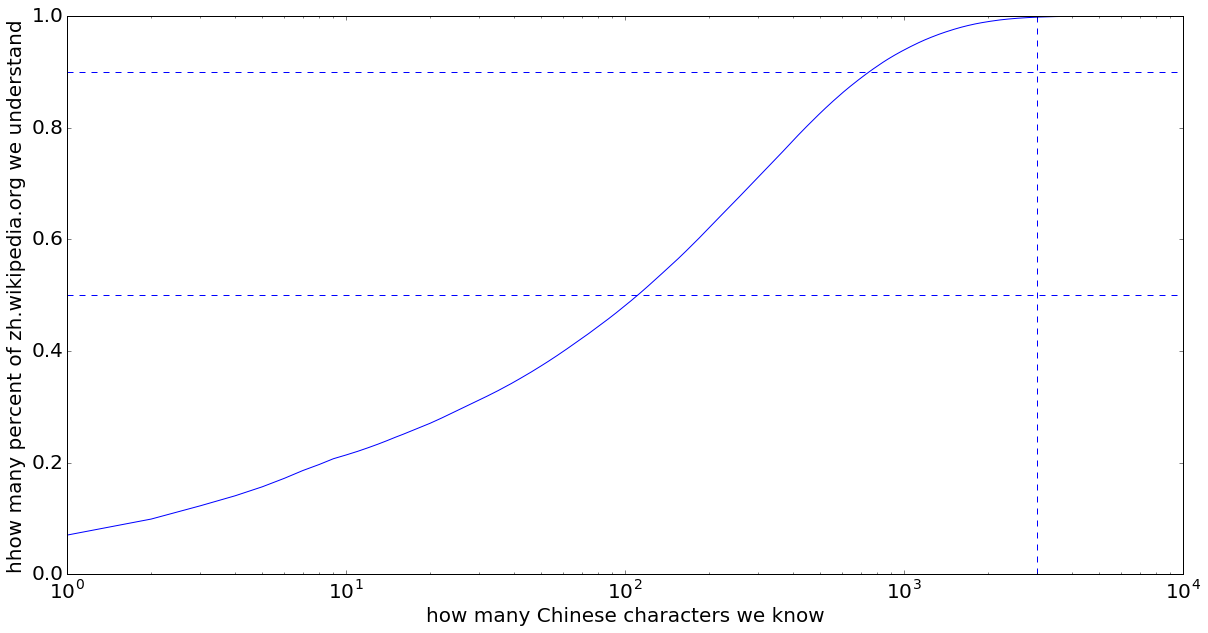

In [55]:
pylab.figure(figsize=(20,10))
pylab.plot(X,np.cumsum(frequencies))
pylab.semilogx()
pylab.xlabel('how many Chinese characters we know')
pylab.ylabel('hhow many percent of zh.wikipedia.org we understand')
pylab.axhline(0.5,ls='--')
pylab.axhline(0.9,ls='--')
pylab.axvline(3000,ls='--')
pylab.ylim(0,1)

In [56]:
def cdf_model(x,a,b,c):
    t = np.sum(np.exp(model(x,a,b,c)))
    return np.cumsum(np.exp(model(x,a,b,c)))/t

(0, 1)

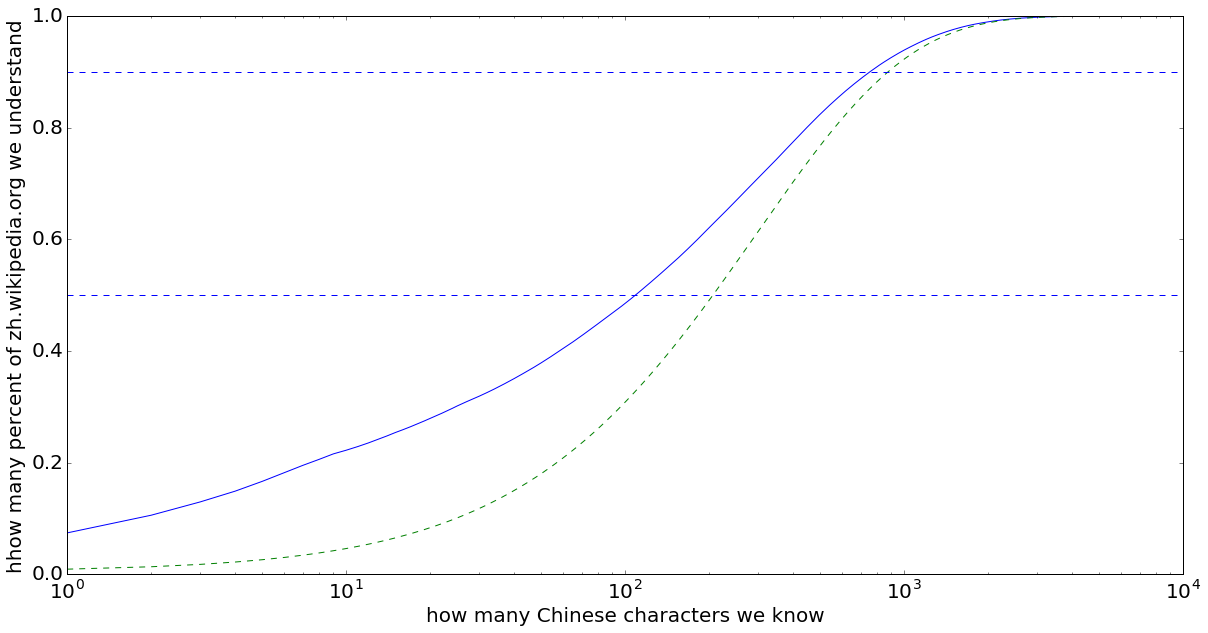

In [18]:
pylab.figure(figsize=(20,10))
pylab.plot(X,np.cumsum(frequencies))
pylab.plot(X,cdf_model(X,*popt_p),ls='--')
pylab.semilogx()
pylab.xlabel('how many Chinese characters we know')
pylab.ylabel('hhow many percent of zh.wikipedia.org we understand')
pylab.axhline(0.5,ls='--')
pylab.axhline(0.9,ls='--')
pylab.ylim(0,1)

## Exercise (advanced)

Can you find a model that fits the frequency distribution of the most seen characters better?

* 

## Word Salad

Now that we know which characters occur most frequently, let's try to find out which ones of them make up words. Chinese has about 1500 syllables ([1],[2]), which means that there are far more words with two or more syllables than with a single syllable. However, about 50 - 70 % of words in common texts are mono-syllabic, whereas 30 % are di-syllabic and only 1-5 % have more than two syllables ([3]).


[1]: https://en.wikipedia.org/wiki/Standard_Chinese_phonology
[2]: http://chinese.stackexchange.com/questions/14596/how-many-syllables-does-chinese-have
[3]: http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0138567

## Let's try to find out which character combinations make up words!

In [57]:
full_text = ' '.join([item['text'] for item in items])
bigram_distribution = get_ngram_distribution(full_text,2)

In [58]:
top_100_bigrams=sorted(bigram_distribution.items(), key=lambda x: -x[1])[:100]
print '\n'.join([u'{}: {}'.format(''.join(c[0]),c[1]) for c in top_100_bigrams])

一页: 132098
下一: 66277
上一: 66168
中国: 23142
发展: 13403
经济: 8415
国家: 7865
人民: 7788
我们: 6743
工作: 5981
社会: 5774
问题: 5631
近平: 4984
网络: 4934
习近: 4929
国际: 4748
历史: 4641
一个: 4641
建设: 4597
创新: 4568
，中: 4455
合作: 4434
改革: 4433
南海: 4196
重要: 4179
主义: 4022
仲裁: 3983
。”: 3972
安全: 3955
世界: 3915
”，: 3876
领导: 3683
分享: 3515
，在: 3495
美国: 3456
企业: 3376
国内: 3331
中央: 3284
党的: 3239
互联: 3236
，是: 3185
政府: 3154
，我: 3151
”。: 3109
政治: 3100
，不: 3083
联网: 3043
关系: 2998
坚持: 2956
群众: 2944
，这: 2863
全国: 2835
干部: 2744
记者: 2734
实现: 2728
通过: 2727
”的: 2727
更多: 2698
会议: 2692
的“: 2673
，也: 2645
研究: 2637
文化: 2618
来，: 2613
　　: 2559
就是: 2544
没有: 2520
解决: 2494
我国: 2472
——: 2459
国的: 2449
战略: 2449
思想: 2434
制度: 2400
技术: 2398
完成: 2394
精神: 2384
信息: 2378
推进: 2372
，“: 2367
服务: 2363
克强: 2346
方面: 2330
日，: 2301
李克: 2299
民族: 2291
书记: 2286
政策: 2279
增长: 2279
组织: 2276
北京: 2262
共产: 2259
市场: 2246
成为: 2235
进行: 2234
推动: 2226
共同: 2219
说，: 2196
的重: 2153
表示: 2132


In [22]:
trigram_distribution = get_ngram_distribution(full_text,3)

In [23]:
top_100_trigrams=sorted(trigram_distribution.items(), key=lambda x: -x[1])[:100]
print '\n'.join([u'{}: {}'.format(''.join(c[0]),c[1]) for c in top_100_trigrams])

下一页: 66019
上一页: 66019
习近平: 3791
，中国: 2639
互联网: 2637
李克强: 2111
门推荐: 1780
热门推: 1779
，我们: 1692
号完成: 1690
标签：: 1606
发展的: 1408
子怡和: 1286
岁章子: 1286
章子怡: 1286
毁所有: 1260
胖毁所: 1260
一胖毁: 1260
中国的: 1230
表示，: 1174
问题，: 1150
进一步: 1139
共产党: 1116
仲裁庭: 1078
的重要: 1062
菲律宾: 1061
发展，: 1048
的发展: 1048
国经济: 1025
我们党: 1020
。中国: 980
自己的: 961
米兰连: 959
国际法: 953
的历史: 934
总书记: 908
国人民: 899
中国人: 898
震撼了: 869
太震撼: 867
撼了！: 867
中国经: 865
的问题: 810
中间价: 789
股派送: 783
国务图: 783
价下调: 783
间价下: 783
斤脂肪: 777
领导人: 769
“中国: 763
。我们: 748
，也是: 733
我们的: 726
指出，: 711
米排渠: 709
是中国: 698
亿美元: 680
，就是: 671
导干部: 658
领导干: 651
问题。: 644
人民群: 643
民群众: 639
络安全: 631
工作，: 630
网络安: 628
国家的: 623
国政府: 623
是一个: 619
的中国: 618
新一代: 615
发展。: 611
习主席: 601
重要的: 600
俄罗斯: 597
：中国: 595
认为，: 594
改革开: 591
革开放: 588
，这是: 578
国务院: 576
，必须: 569
，美国: 563
人民的: 557
，习近: 555
中华民: 553
全球第: 548
华民族: 545
已提交: 544
交上诉: 543
宝马国: 543
提交上: 543
一代宝: 543
马国内: 543
国内涉: 543
社会主: 543
代宝马: 543
中国政: 540
经济发: 535


In [96]:
fivegram_distribution = get_ngram_distribution(full_text,5)

In [97]:
top_100_fivegrams=sorted(fivegram_distribution.items(), key=lambda x: -x[1])[:100]
print '\n'.join([u'{}: {}'.format(''.join(c[0]),c[1]) for c in top_100_fivegrams])

俄密切关注: 1690
岁章子怡和: 1286
一胖毁所有: 1260
太震撼了！: 867
中间价下调: 783
斤脂肪瘤拼: 777
已提交上诉: 543
居全球第二: 521
科比告别战: 495
中国共产党: 418
李克强总理: 285
马克思主义: 225
习近平主席: 224
限挑科比告: 212
挑科比告别: 212
极限挑科比: 212
《极限挑科: 212
南海仲裁案: 212
李克强会见: 185
人民群众的: 166
新华社北京: 162
“十三五”: 160
有没有人管: 159
供给侧改革: 145
可持续发展: 144
，中国政府: 142
临时仲裁庭: 142
日电（记者: 131
个百分点。: 127
互联网企业: 125
新华社记者: 123
的基础上，: 117
长三批在即: 116
，中国经济: 115
，中国人民: 114
习近平会见: 114
中央政治局: 112
表示，中国: 111
国家网信办: 109
日报道称，: 109
发展中国家: 108
来源：中国: 108
新兴经济体: 106
结合起来，: 100
“营改增”: 96
中华民族的: 96
实现中国梦: 96
中国经济的: 96
中国人民的: 93
结构性改革: 92
党的十八大: 91
“中国梦”: 91
社会主义的: 91
新发展理念: 91
经济发展的: 91
专家一带一: 90
人死亡诈骗: 90
“十二五”: 90
家一带一路: 90
为人死亡诈: 90
毛泽东思想: 89
李保国同志: 88
前所未有的: 88
中国互联网: 87
互联网发展: 85
民主集中制: 85
【专家谈】: 84
科学发展观: 84
数据显示，: 83
哈萨克斯坦: 83
进一步加强: 82
习近平同志: 82
中国青年网: 81
的情况下，: 80
命运共同体: 80
告诉记者，: 80
新华网北京: 79
共产党人的: 79
外媒：中国: 79
不忘初心，: 79
国家统计局: 76
南海问题的: 75
移动互联网: 74
，习总书记: 74
改革开放的: 73
中国领导人: 73
，习近平在: 73
中国经济网: 73
日，习近平: 72
新型城镇化: 72
《公约》的: 71
领导人会议: 71
互联网时代: 71
习近平出席: 71
个百分点，: 70
经济新

## Questions that we'll try to answer (without speaking a word of Chinese!)

* Which of those characters are words on their own, and which are part of a word?
* How does the number of distinct characters vary from page to page?
* Which pages are probably related, given the characters that appear in them?

### Question 1: Which character sequences are words?

To work this out, we can make use of some Bayesian statistics!

$$P(H|E) = \frac{P(E|H)\cdot P(H)}{P(E)}$$

Here, our hypothesis $H$ is that a given character sequence is a word, $E$ is the evidence of finding that sequence. So, $P(E)$ is the probability of encountering the character sequence in our text, whereas $P(E|H)$ is the probability of finding the sequence given that the hypothesis is true, whereas $P(H)$ is the prior probability that the hyptothesis is true.



# Exercices

* Write a crawler for another Chinese website and run it to gather some data
* Use the crawled data to perform the analyses that we did above (and possibly some others)
* Load the classical Chinese text by Zhang Dai (a Ming dynasty writer who lived 1597-1689), which you can find in 'western-lake.txt', and perform the same analyses as above on it. Analyze the difference to a contemporary text

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
count_vect = CountVectorizer()

In [63]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                                 min_df=2, stop_words=None,
                                 use_idf=True)
X = vectorizer.fit_transform([item['text'] for item in items])

In [64]:
X

<2793x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 681178 stored elements in Compressed Sparse Row format>

In [72]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000, n_init=1, verbose=False)

In [73]:
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=1000, n_clusters=4, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=False)

In [74]:
categories = km.predict(X)[:20]

for i,item in enumerate(items[:20]):
    print item['url'],categories[i]

http://china.chinadaily.com.cn/theory/node_1144725.htm 2
http://china.chinadaily.com.cn/node_1143905.htm 2
http://china.chinadaily.com.cn/node_1143902.htm 1
http://china.chinadaily.com.cn/node_1143906.htm 1
http://china.chinadaily.com.cn/node_1143904.htm 1
http://china.chinadaily.com.cn/theory/2016-07/14/content_26092825.htm 3
http://china.chinadaily.com.cn/2016-05/12/content_25243726.htm 2
http://china.chinadaily.com.cn/2016-06/20/content_25777809.htm 0
http://china.chinadaily.com.cn/theory/2016-07/02/content_25941307.htm 3
http://china.chinadaily.com.cn/2016-07/18/content_26133675.htm 3
http://china.chinadaily.com.cn/2016-06/09/content_25661537.htm 0
http://china.chinadaily.com.cn/node_1143902_584.htm 1
http://china.chinadaily.com.cn/node_1143902_585.htm 1
http://china.chinadaily.com.cn/node_1143902_771.htm 1
http://china.chinadaily.com.cn/node_1143902_686.htm 1
http://china.chinadaily.com.cn/2016sy/2016-06/13/content_25694076.htm 0
http://china.chinadaily.com.cn/2016-06/15/content_2

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)